# <center>Red Neuronal</center>

#### <center>Karina Robles Martínez</center>

#### <center>Facultad de Ciencias</center>

#### <center>Algoritmos Computacionales</center>








In [94]:
import numpy as np 

import matplotlib.pyplot as plt

from scipy import optimize



In [50]:
# X = (horas dormidas, horas estudiadas), y = calificacion de una materia
X = np.array(([2,5], [9,1], [6,10]), dtype=float)
Y = np.array(([70], [50], [90]), dtype=float)


In [51]:
X

array([[ 2.,  5.],
       [ 9.,  1.],
       [ 6., 10.]])

In [52]:
Y

array([[70.],
       [50.],
       [90.]])

In [53]:
print (X.shape, Y.shape)  #de cuanto es la matriz

(3, 2) (3, 1)


CON ESTO EL ALGORITMO NOS AVIENTA RESULTADOS DE MANERA ALEATORIA SIN NINGUN PROCESO DE APRENDIZAJE, POR LO QUE TENEMOS QUE INVESTIGAR EL **ERROR** QUE HAY EN ESTE ALGORITMO EN BASE A UN RESULTADO QUE NOSOTROS YA TENGAMOS (por ejemplo dormir 2 hrs, estudiar 5 hrs y sacar 7 )

EL CALCULO DE ESTE ERROR ES EL RESULTADO DESEADO **(Y)** - EL RESULTADO OBTENIDO POR EL ALGORITMO **(yS )** 

$ERROR = ((Y - yS)^2 )* \frac{1}{2} $ 

"COSTO RESPRESENTADO POR UNA J, para no tener un problema multidimensional se minimizara este costo de manera tal que el algoritmo aprenda a modificarlo pra que este sea minimo para esto utilizare la **derivacion parcial** para aquellas situaciones en las que sea mas de un costo" y la **derivacion normal** para aquellas situaciones en donde sea un solo costo


Es necesario minimizar el costo del error provocado por los pesos,para esto es necesario corregirlos por el descenso del grandiente entonces es necesario derivar el costo con respecto al peso dC/dW

$ \frac{\partial J}{\partial\dot W^2} = - ( Y - yS ) yS'$

$ \frac{\partial J}{\partial\dot W^2} = - ( Y - yS ) F'(Z) Z'(W) $

$ F'(Z) = \frac{e^{-z}}{(1 + (e^{-z}))^2}$

$ Z'(W) = A  ; $   valores de activacion


$ Z^3 = A^2 W^2 $

En el algoritmo queda :

$ \frac{\partial J}{\partial\dot W^2} = (a^2)^T \delta^3$

$\delta^3 = - (Y- yS) F'(z^3)$


**LUEGO**


VAMOS A CORREGIR DE LA CAPA OCULTA A LA PRIMERA CAPA :

$ \frac{\partial J}{\partial\dot W^1} = X^T \delta^2$


$\delta^2 = \delta^3 (W^2)^T F'(z^2)$  


DELTA3 * COSTOS OBTENIDOS ENTRE LA CAPA 2 Y LA CAPA DE SALIDA * LAFUNCION sigmoidePrima evaluada con los valores de la suma ponderada de la capa 2


In [154]:
#Vamos a multiplicar la entrada de la neurona por el peso *la sinapsis nerviosa para cada capa

#ENTRADA
        
class Neural_Network(object):
    def __init__(self):
        self.NumNeuronasInput = 2 #numero de neuronas de la capa de entrada
        self.NumNeuronasOutput = 1#numero de neuronas de la capa de salida
        self.NumNeuronasHidden = 3  #numero de neuronas de la capa oculta
        
#PESOS

#Vamos a definir los pesos de manera aleatoria  con random  y con rand:nos genera una matriz de valores aleatorios de 0 a 1
#pesos W1 sera los que estan entre la capa de entrada y la capa oculta
        
        self.W1 = np.random.rand(self.NumNeuronasInput, self.NumNeuronasHidden)

#pesos W2 seran los que estan entre la capa hidden y la de salida

        self.W2 = np.random.rand(self.NumNeuronasHidden, self.NumNeuronasOutput)
    
#X es la matriz de entrada
#W es la matriz de pesos
#Z sera el resultado de actividad neuronal 


#PROPAGACION DE LA RED NEURONAL

    def avanzar (self,X):
        
        self.z2 = np.dot(X, self.W1)  #suma ponderada de XW1
        
        self.a2 = self.sigmoid(self.z2) #activacion de las neuronas de la capa 2
        
        self.z3 = np.dot(self.a2, self.W2) #resultado del todo este algoritmo va a ser calculado por la multiplicacion de la funcion sigmoid por la ultima suma ponderada de la capa 3 o capa de salida.
        yS = self.sigmoid(self.z3)
    
        return yS
    
    def sigmoid(self,z):
    #aplicar la activacion de la funcion sigmoide a un vector, escalar o matriz
        return 1/(1+np.exp(-z))
    
    #OBTENEMOS LA DERIVADA DE LA FUNCION SIGMOID

#def sigmoidPrima (self, X,Y):
    
 #   self.yS = self.forward(X) #valor de yS
    
  #  delta3 = np.multiply(-(Y - self.yS), self.sigmoidPrima(self.z3)) # delta3 = - ( Y - yS ) F'(Z) Z'(W) 
    
    
    #vamos a multiplicar la matriz de activacion transpuesta (.t) para que concuerden las dimensiones de las matrices 
    #valores de activacion con los valores de delta van a estar en la misma dimension
    
    
   # djdw2 = np.dot(self.a2.T, delta3) #hasta aqui logramos corregir de la ultima capa a la capa oculta
    
    
    ## LUEGO
    
    #delta2 = np.dot(delta3, self.W2.T)* self.sigmoidPrime(self.z2)
    
    #djdw1 = np.dot(X.T, delta2)  #matriz entradas transpuesta por la multiplicacion del delta2
    #return djw1, djw2
    
   
    def sigmoidPrima(self,z):
        #derivada de la funcion prima(*gradiente de prima)
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, Y):
        
        self.yS = self.avanzar(X) #Calcular el costo para una X dada, y usar los pesos ya almacenados en la clase.
        J = 0.5*sum((Y-self.yS)**2)
        return J
        
    def costFunctionPrima(self, X, Y):
        
        self.yS = self.avanzar(X) # Derivado  con respecto a W1 y W2 para una X e Y dadas:

        
        delta3 = np.multiply(-(Y-self.yS), self.sigmoidPrima(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrima(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    




        


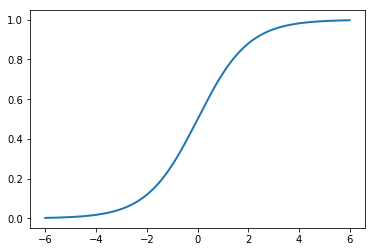

In [155]:
testInput = np.arange(-6,6,0.01)
plt.plot(testInput, sigmoid(testInput), linewidth= 2)



In [156]:
sigmoid(6)




0.9975273768433653

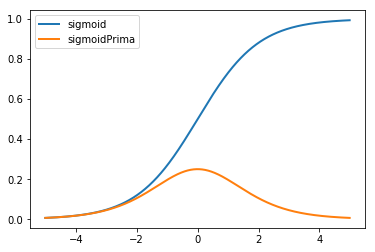

In [157]:
testValues = np.arange(-5,5,0.01)
plt.plot(testValues, sigmoid(testValues), linewidth=2)
plt.plot(testValues, sigmoidPrime(testValues), linewidth=2)
plt.legend(['sigmoid', 'sigmoidPrima'])

In [158]:
NN = Neural_Network()


In [159]:
cost1 = NN.costFunction(X,Y)

In [160]:
dJdW1, dJdW2 = NN.costFunctionPrima(X,Y)

In [161]:
dJdW1

array([[-0.34248659, -1.76098767, -0.56053561],
       [-0.67325209, -3.00868847, -0.70030406]])

* COMPROBAR LOS GRADIENTES CALCULADOS ANTES

* GRAFICAR HORAS DORMIDAS CONTRA HORAS ESTUDIADAS Y CALIFICACION OBTENIDA

In [172]:
#Test red para varias combinaciones de sueño / estudio:
hrsDormidas = np.linspace(0, 10, 100)
hrsEstudiadas = np.linspace(0, 5, 100)

# Normalizar los datos (de la misma manera que los datos de entrenamiento se normalizan)
hrsDormidasNorm = hrsDormidas/10.
hrsEstudiadasNorm = hrsEstudiadas/5.

#Crear versiones 2-d de entrada para el trazado
a, b  = np.meshgrid(hrsDormidasNorm, hrsEstudiadasNorm)

#trabajar en una sola matriz de entrada:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [173]:
allOutputs = NN.avanzar(allInputs)

Text(0, 0.5, 'Horas Estudiadas')

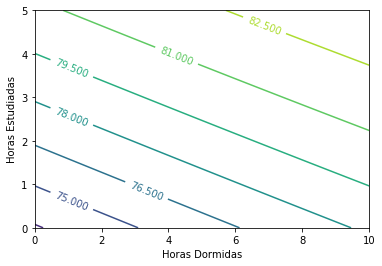

In [175]:
#GRAFICA DE contornos:
yy = np.dot(hrsEstudiadas.reshape(100,1), np.ones((1,100)))
xx = np.dot(hrsDormidas.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('Horas Dormidas')
plt.ylabel('Horas Estudiadas')